# Оценка эффективности моделей бинарной классификации.

In [ ]:
import numpy as np
import pandas as pd

# визуализация
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.feature_extraction import text

# train-test
from sklearn.model_selection import train_test_split

# methods
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier



from sklearn.model_selection import learning_curve

# 1 Загрузите данные о вероятности развития сердечного приступа. Описание датасета смотрите здесь:

In [ ]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 2 Разделите данные на обучающую и тестовую выборки в соотношении 80% / 20% без перемешивания.

In [ ]:
X = df.drop(['output'], axis=1)
Y = df.output

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Постройте следующие модели классификации:
## случайное предсказание (подбрасывание кубика)
## логистическая регрессия (LogisticRegression);
## метод опорных векторов с линейным ядром (SVC(kernel='linear'));
## метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)
## метод k ближайших соседей (KNeighborsClassifier с двумя классами).

In [ ]:
methods = {'logistic regression': LogisticRegression(),
           'svc: linear kernel': svm.SVC(kernel='linear'),
           'lda': LinearDiscriminantAnalysis(),
           'k neighbours': KNeighborsClassifier(2)}

In [ ]:
def classifier_train(i, method):
    model = methods[method]
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_train)
    methods_score_train[str(method)] = [metrics.accuracy_score(Y_train, Y_pred),
                                        metrics.precision_score(Y_train, Y_pred),
                                        metrics.recall_score(Y_train, Y_pred)]
    cm = metrics.confusion_matrix(Y_train, Y_pred)
    annot_arr = np.array([['TN: '+str(cm[0][0]), 'FP: '+str(cm[0][1])],
                      ['FN: '+str(cm[1][0]), 'TP: '+str(cm[1][1])]], dtype = str)

    sns.heatmap(cm, linewidths=.5, annot=annot_arr, annot_kws={'fontsize':20}, fmt='',
            xticklabels=[None,None], yticklabels=[None,None], ax=ax[i])
    ax[i].set_title(list(methods.keys())[i])

In [ ]:
def classifier_train_random(Y_pred):
    methods_score_train['random choice'] = [metrics.accuracy_score(Y_train, Y_random_pred_tr),
                                            metrics.precision_score(Y_train, Y_random_pred_tr),
                                            metrics.recall_score(Y_train, Y_random_pred_tr)]

    cm = metrics.confusion_matrix(Y_train, Y_pred)
    annot_arr = np.array([['TN: '+str(cm[0][0]), 'FP: '+str(cm[0][1])],
                      ['FN: '+str(cm[1][0]), 'TP: '+str(cm[1][1])]], dtype = str)

    sns.heatmap(cm, linewidths=.5, annot=annot_arr, annot_kws={'fontsize':20}, fmt='',
            xticklabels=[None,None], yticklabels=[None,None], ax=ax[len(methods)])
    ax[len(methods)].set_title('random choice')

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


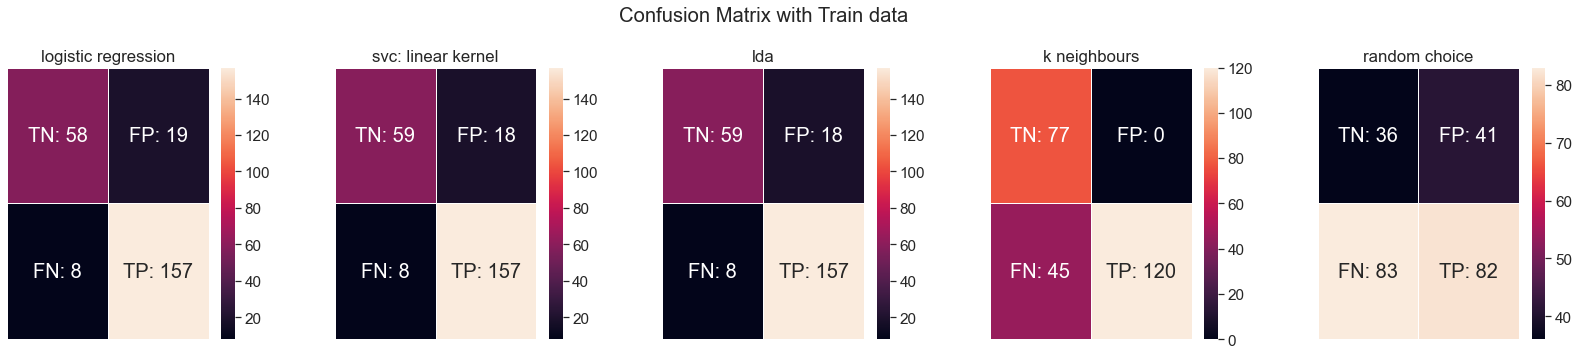

In [ ]:
methods_score_train = dict()


fig, ax = plt.subplots(1,5, figsize=(28,5))
plt.suptitle('Confusion Matrix with Train data', y=1.05)
plt.subplots_adjust(wspace=0.3)

for i, method_name in enumerate(methods.keys()):
    classifier_train(i, method_name)

Y_random_pred_tr = np.random.choice(2, size = len(Y_train))
classifier_train_random(Y_random_pred_tr)

plt.show()

methods_train_df = pd.DataFrame(methods_score_train.values(),
                                columns = ['Accuracy','Precision','Recall'],
                                index = methods_score_train.keys())


In [ ]:
def classifier_test(i, method):
    model = methods[method]
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    methods_score_test[str(method)] = [metrics.accuracy_score(Y_test, Y_pred),
                                     metrics.precision_score(Y_test, Y_pred),
                                     metrics.recall_score(Y_test, Y_pred)]

    cm = metrics.confusion_matrix(Y_test, Y_pred)
    annot_arr = np.array([['TN: '+str(cm[0][0]), 'FP: '+str(cm[0][1])],
                        ['FN: '+str(cm[1][0]), 'TP: '+str(cm[1][1])]], dtype = str)

    sns.heatmap(cm, linewidths=.5, annot=annot_arr, annot_kws={'fontsize':20}, fmt='',
              xticklabels=[None,None], yticklabels=[None,None], ax=ax[i])
    ax[i].set_title(list(methods.keys())[i])

In [ ]:
def classifier_test_random(Y_pred):
    methods_score_test['random choice'] = [metrics.accuracy_score(Y_test, Y_random_pred_te),
                                        metrics.precision_score(Y_test, Y_random_pred_te),
                                        metrics.recall_score(Y_test, Y_random_pred_te)]

    cm = metrics.confusion_matrix(Y_test, Y_pred)
    annot_arr = np.array([['TN: '+str(cm[0][0]), 'FP: '+str(cm[0][1])],
                      ['FN: '+str(cm[1][0]), 'TP: '+str(cm[1][1])]], dtype = str)

    sns.heatmap(cm, linewidths=.5, annot=annot_arr, annot_kws={'fontsize':20}, fmt='',
            xticklabels=[None,None], yticklabels=[None,None], ax=ax[len(methods)])
    ax[len(methods)].set_title('random choice')

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

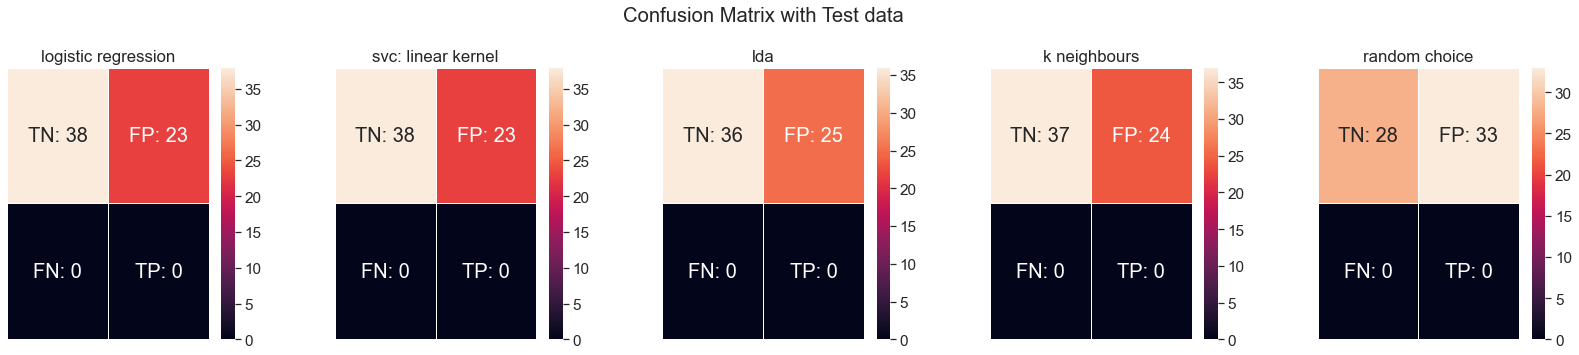

In [ ]:
methods_score_test = dict()

fig, ax = plt.subplots(1,5, figsize=(28,5))
plt.suptitle('Confusion Matrix with Test data', y=1.05)
plt.subplots_adjust(wspace=0.3)

for i, method_name in enumerate(methods.keys()):
    classifier_test(i, method_name)

Y_random_pred_te = np.random.choice(2, size = len(Y_test))
classifier_test_random(Y_random_pred_te)

plt.show()

methods_test_df = pd.DataFrame(methods_score_test.values(),
                               columns = ['Accuracy','Precision','Recall'],
                               index = methods_score_test.keys())

### TN:верно спрогнозировано отсутствие сердечной недостаточности
### FP:неверно спрогнозировано наличие сердечной недостаточности
### FN:неверно спрогнозировано отсутствие сердечной недостаточности
### TP:верно спрогнозировано наличие сердечной недостаточности

In [ ]:
methods_train_df

,Accuracy,Precision,Recall
logistic regression,0.855372,0.831081,0.924812
svc: linear kernel,0.855372,0.826667,0.932331
lda,0.847107,0.820000,0.924812
k neighbours,0.805785,1.000000,0.646617
random choice,0.438017,0.486957,0.421053


In [ ]:
methods_test_df

,Accuracy,Precision,Recall
logistic regression,0.852459,0.828571,0.90625
svc: linear kernel,0.852459,0.810811,0.93750
lda,0.852459,0.810811,0.93750
k neighbours,0.606557,0.700000,0.43750
random choice,0.508197,0.529412,0.56250


![image.png](attachment:image.png)

accuracy показывает, сколько всего правильно определенных диагнозов среди всех испытаний

на train data больше всего правильных диагнозов определено при использовании метода линейного дискриминантного анализа и метода опорных векторов с линейным ядром (accuracy = 0.89)

на test data больше всего правильных диагнозов определено при использовании метода логистической регрессии и метода опорных векторов с линейным ядром (accuracy = 0.62)

![image.png](attachment:image.png)

precision показывает, насколько часто правильно прогнозируется сердечная недостаточность среди всех случаев, когда такой диагноз был определен

на train data среди всех случаев определения диагноза сердечной недостаточности чаще всего диагноз правильно прогнозируется при использовании метода k-ближайших соседей с 2 соседями (precision = 1)

![image.png](attachment:image.png)

recall показывает, насколько часто прогнозируется сердечная недостаточность среди всех случаев, когда она действительно была

на train data среди всех случаев наличия сердечной недостаточности чаще всего диагноз прогнозируется при использовании метода логистической регрессии,

метода опорных векторов с линейным ядром и метода линейного дискриминантного анализа (recall = 0.95)

<AxesSubplot:title={'center':'Сравнение методов классификации: Train Data'}>

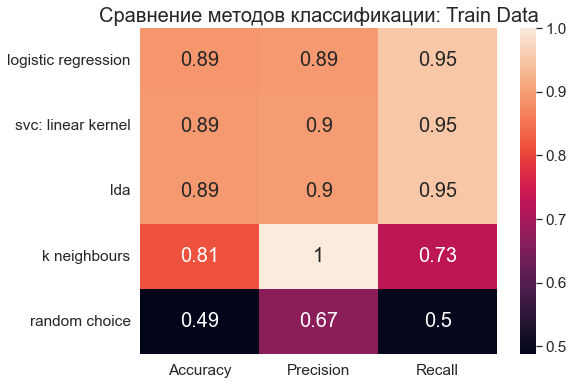

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
plt.title('Сравнение методов классификации: Train Data', fontsize = 20)

sns.heatmap(methods_train_df, annot=True, annot_kws={'fontsize':20})

<AxesSubplot:title={'center':'Сравнение методов классификации: Test Data'}>

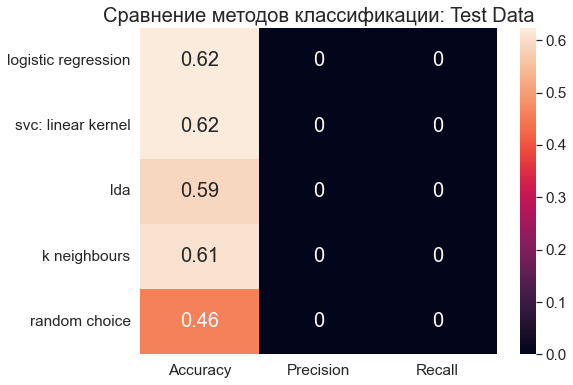

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
plt.title('Сравнение методов классификации: Test Data', fontsize = 20)

sns.heatmap(methods_test_df, annot=True, annot_kws={'fontsize':20})

# 4 На основе метрики accuracy сделайте вывод о недообученности-переобученности модели логистической регрессии. Для этого сделайте предсказание на тренировочном датасете и посчитайте accuracy на нём, затем на тестовом датасете и тоже посчитайте accuracy. Сравните эти значения, они должны быть примерно одинаковыми. Если точность на обучающей выборке оказывается сильно выше - это означает, что модель переобучилась.

In [ ]:
pd.DataFrame([methods_train_df.loc[['logistic regression']].Accuracy,
              methods_test_df.loc[['logistic regression']].Accuracy],
             index = ['Train', 'Test'])

,logistic regression
Train,0.855372
Test,0.852459


# 6 На одном графике постройте ROC-кривые для каждой модели. Визуально определите самую эффективную и наименее пригодную модели. Чем ROC-кривая выше, тем модель более эффективна.

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [ ]:
methods = {'logistic regression': LogisticRegression(),
           'svc: linear kernel': svm.SVC(kernel='linear',probability=True),
           'lda': LinearDiscriminantAnalysis(),
           'k neighbours': KNeighborsClassifier(2)}

In [ ]:
def classifier(i, method):
    model = methods[method]
    model.fit(X_train, Y_train)
    Y_pred_prob = model.predict_proba(X_test)[:,1]

    auc = roc_auc_score(Y_test, Y_pred_prob)
    # ROC-кривая
    FP_rate, TP_rate, thresholds = roc_curve(Y_test, Y_pred_prob)

    plt.plot(FP_rate, TP_rate,
           lw=4, alpha = 0.6,
           label=str(method)+' (area = %0.2f)' % auc)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


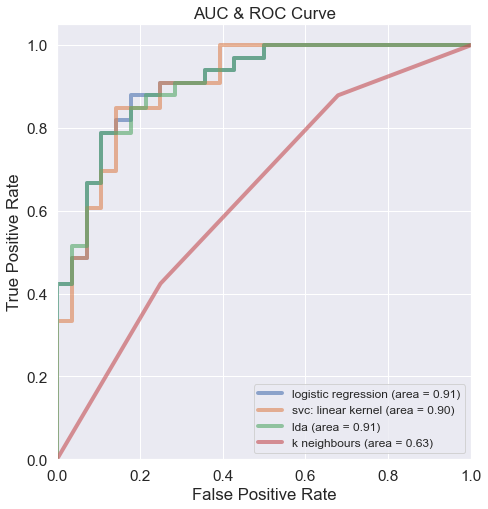

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

plt.figure(figsize=(10, 8))
plt.axis('scaled')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("AUC & ROC Curve")

for i, method_name in enumerate(methods.keys()):
    classifier(i, method_name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right", fontsize=12)
plt.show()

# Задания для самостоятельного выполнения

## Изобразите precision-recall кривую.
## Оцените эффективность моделей при помощи показателя average precision.
## Постройте другую классификационную модель и сравните ее с описанными по следующим метрикам: accuracy, precision, recall, ROC-AUC, F1. Сделайте вывод о том, какая модель наиболее удачная для данной задачи.

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [ ]:
def precision_recall_f(i, method):
    model = methods[method]
    model.fit(X_train, Y_train)
    Y_pred_prob = model.predict_proba(X_test)[:,1]

    precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_prob)
    average_precision = average_precision_score(Y_test, Y_pred_prob)

    plt.plot(recall, precision, lw=3, alpha = 0.6, label=str(method)+' (Average Precision = %0.2f)' % average_precision)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


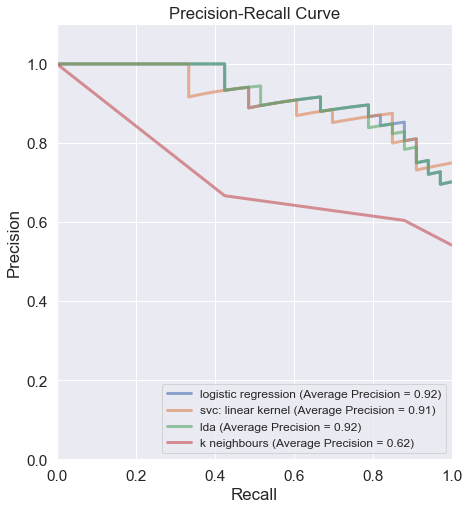

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis('scaled')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.title("Precision-Recall Curve")

for i, method_name in enumerate(methods.keys()):
    precision_recall_f(i, method_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
def mlp_classifier_train():
    model = MLPClassifier()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_train)
    methods_score_train[str('mlp')] = [metrics.accuracy_score(Y_train, Y_pred),
                                     metrics.precision_score(Y_train, Y_pred),
                                     metrics.recall_score(Y_train, Y_pred)]

    cm = metrics.confusion_matrix(Y_train, Y_pred)
    annot_arr = np.array([['TN: '+str(cm[0][0]), 'FP: '+str(cm[0][1])],
                        ['FN: '+str(cm[1][0]), 'TP: '+str(cm[1][1])]], dtype = str)

    sns.heatmap(cm, linewidths=.5, annot=annot_arr, annot_kws={'fontsize':20}, fmt='',
              xticklabels=[None,None], yticklabels=[None,None], ax=ax[0])
    ax[0].set_title('Confusion Matrix: Train Data')

In [ ]:
def mlp_classifier_test():
    model = MLPClassifier()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    methods_score_test[str('mlp')] = [metrics.accuracy_score(Y_test, Y_pred),
                                     metrics.precision_score(Y_test, Y_pred),
                                     metrics.recall_score(Y_test, Y_pred)]

    cm = metrics.confusion_matrix(Y_test, Y_pred)
    annot_arr = np.array([['TN: '+str(cm[0][0]), 'FP: '+str(cm[0][1])],
                        ['FN: '+str(cm[1][0]), 'TP: '+str(cm[1][1])]], dtype = str)

    sns.heatmap(cm, linewidths=.5, annot=annot_arr, annot_kws={'fontsize':20}, fmt='',
              xticklabels=[None,None], yticklabels=[None,None], ax=ax[1])
    ax[1].set_title('Confusion Matrix: Test Data')

In [ ]:
def mlp_roc():
    model = MLPClassifier()
    model.fit(X_train, Y_train)
    Y_pred_prob = model.predict_proba(X_test)[:,1]

    auc = roc_auc_score(Y_test, Y_pred_prob)
    # ROC-кривая
    FP_rate, TP_rate, thresholds = roc_curve(Y_test, Y_pred_prob)

    ax[2].plot(FP_rate, TP_rate, lw=4, alpha = 0.6, label='mlp (area = %0.2f)' % auc)
    ax[2].plot([0, 1], [0, 1], linestyle='--')
    ax[2].set_title('ROC_AUC')
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].legend(loc="lower right", fontsize=12)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


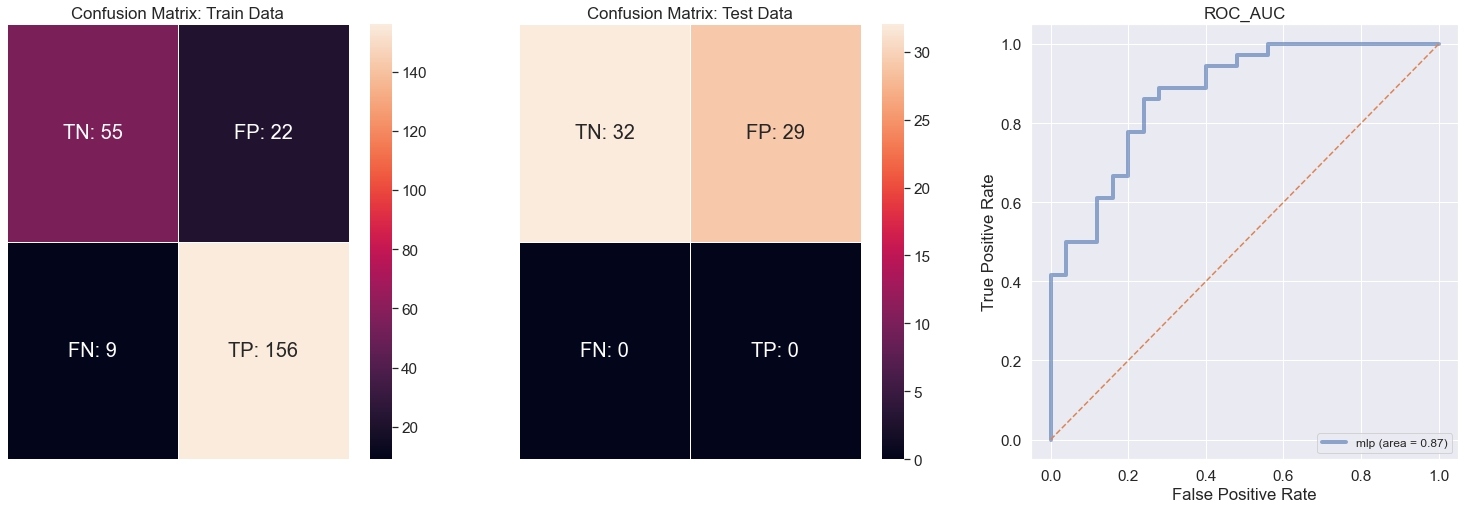

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(26,8))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
mlp_roc()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
mlp_classifier_train()
mlp_classifier_test()

plt.show()

<AxesSubplot:title={'center':'Сравнение методов классификации: Train Data'}>

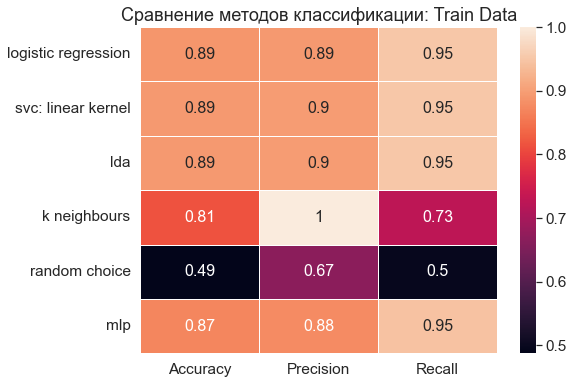

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
plt.title('Сравнение методов классификации: Train Data', fontsize = 18)
methods_train_df.loc['mlp'] = methods_score_train['mlp']

sns.heatmap(methods_train_df, linewidths=.5, annot=True, annot_kws={'fontsize':16})

<AxesSubplot:title={'center':'Сравнение методов классификации: Test Data'}>

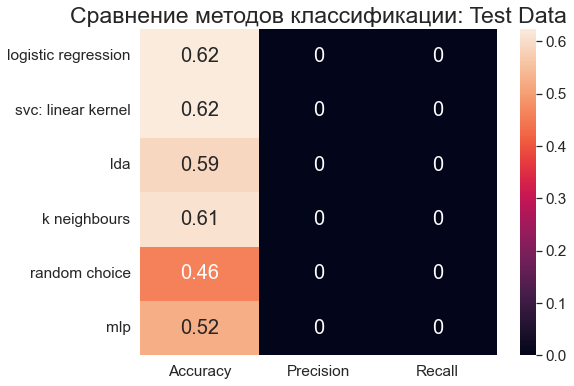

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
plt.title('Сравнение методов классификации: Test Data', fontsize = 23)

methods_test_df.loc['mlp'] = methods_score_test['mlp']
sns.heatmap(methods_test_df, annot=True, annot_kws={'fontsize':20})

Контрольные вопросы
1) Что обозначают элементы confusion matrix?
![image-4.png](attachment:image-4.png)
TN:верно спрогнозировано отсутствие сердечной недостаточности
FP:неверно спрогнозировано наличие сердечной недостаточности
FN:неверно спрогнозировано отсутствие сердечной недостаточности
TP:верно спрогнозировано наличие сердечной недостаточности


2) По какой формуле рассчитывается метрика accuracy? Что она показывает?
![image.png](attachment:image.png)
accuracy показывает, сколько всего правильно определенных диагнозов среди всех испытаний

3) Почему метрика accuracy непригодна при дисбалансе классов?

Потому что при дисбалансе классов у нас значение может быть очень маленькое и не пропорциональное

4) По какой формуле рассчитывается метрика precision? Что она показывает?
![image-2.png](attachment:image-2.png)
precision показывает, насколько часто правильно прогнозируется сердечная недостаточность среди всех случаев, когда такой диагноз был определен

5) По какой формуле рассчитывается метрика recall? Что она показывает?
![image-3.png](attachment:image-3.png)
recall показывает, насколько часто прогнозируется сердечная недостаточность среди всех случаев, когда она действительно была

6) Какая метрика объединяет в себе precision и recall? По какой формуле она рассчитывается?
![image-5.png](attachment:image-5.png)
F1-score

7) Какой показатель часто используется для сравнительного анализа нескольких моделей классификации?

AUC

8) Зависимость каких величин (при изменении порога) показывает ROC-кривая?
Истинноположительных результатов к Ложноположительным результатам
Чем ROC-кривая выше, тем модель более эффективна.